In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [175]:
df = pd.read_csv('../data/county.csv')

In [176]:
df.head()

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,Alabama,43671.0,54571,55504.0,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.70,55317.0,none
1,Baldwin County,Alabama,140415.0,182265,212628.0,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562.0,none
2,Barbour County,Alabama,29038.0,27457,25270.0,-6.22,27.2,68.0,11.1,5.90,no,hs_diploma,17891.73,33368.0,partial
3,Bibb County,Alabama,20826.0,22915,22668.0,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404.0,none
4,Blount County,Alabama,51024.0,57322,58013.0,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412.0,none


<AxesSubplot:xlabel='pop2010', ylabel='pop_change'>

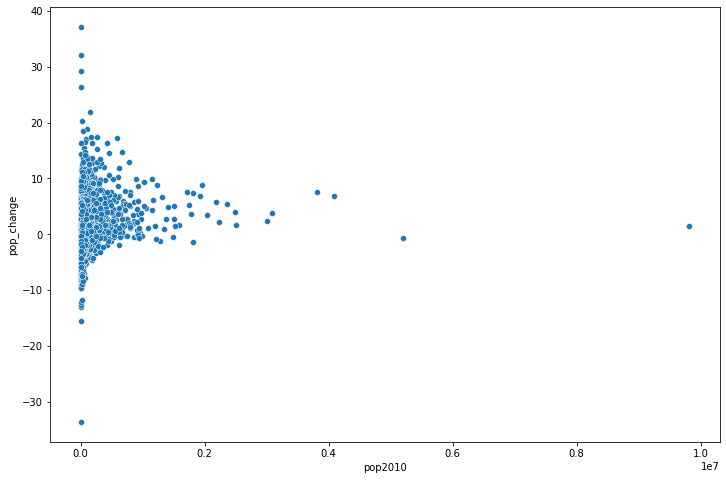

In [177]:
plt.figure(figsize = (12,8))
sns.scatterplot(data=df[['pop_change', 'pop2010']], y='pop_change', x='pop2010')

### Options for improving the model fit

In [178]:
df['pop2010_log10'] = np.log10(df['pop2010'])

<AxesSubplot:xlabel='pop2010_log10', ylabel='pop_change'>

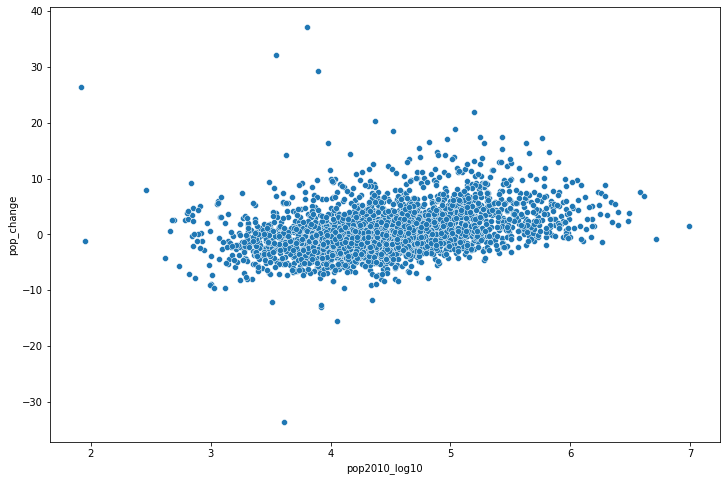

In [179]:
plt.figure(figsize = (12,8))
sns.scatterplot(data=df[['pop_change', 'pop2010_log10']], y='pop_change', x='pop2010_log10')

In [180]:
model = ols('pop_change ~ pop2010_log10', data=df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             pop_change   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     458.0
Date:                Sat, 22 Jan 2022   Prob (F-statistic):           5.96e-95
Time:                        21:48:47   Log-Likelihood:                -8656.5
No. Observations:                3139   AIC:                         1.732e+04
Df Residuals:                    3137   BIC:                         1.733e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -9.6986      0.483    -20.081

In [181]:
print(res.params)

Intercept       -9.698559
pop2010_log10    2.294286
dtype: float64


In [182]:
b0_val = res.params['Intercept']
print(b0_val)

-9.698559463724896


In [183]:
b1_val = res.params['pop2010_log10']
print(b1_val)

2.29428587757005


In [184]:
print("R2: ", res.rsquared)

R2:  0.12739197830216875


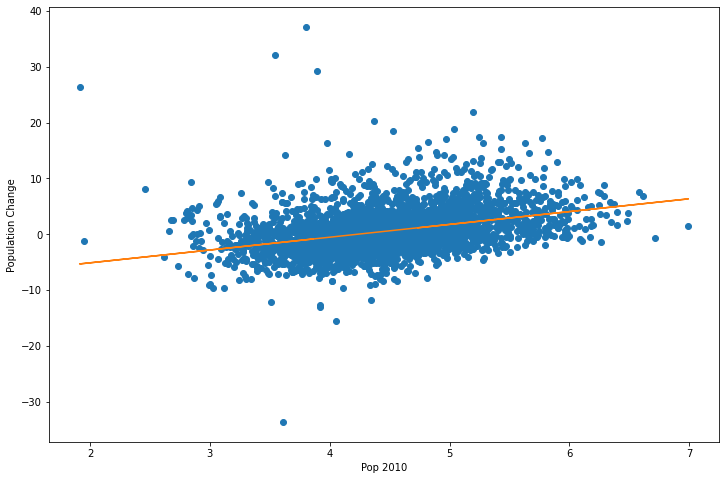

In [185]:
plt.figure(figsize = (12,8))

x = np.array(df['pop2010_log10'])
y = np.array(df['pop_change'])
             
plt.plot(x, y, 'o')

plt.plot(x, b1_val * x + b0_val)

plt.xlabel("Pop 2010")
plt.ylabel("Population Change")

plt.show()

#### Assumptions of Multiple Regression
- The residuals of the model are nearly normal
- The variability of the residuals is nearly constant
- The residuals are independent
- Each variable is linearly related to the outcome

eval_env: 1


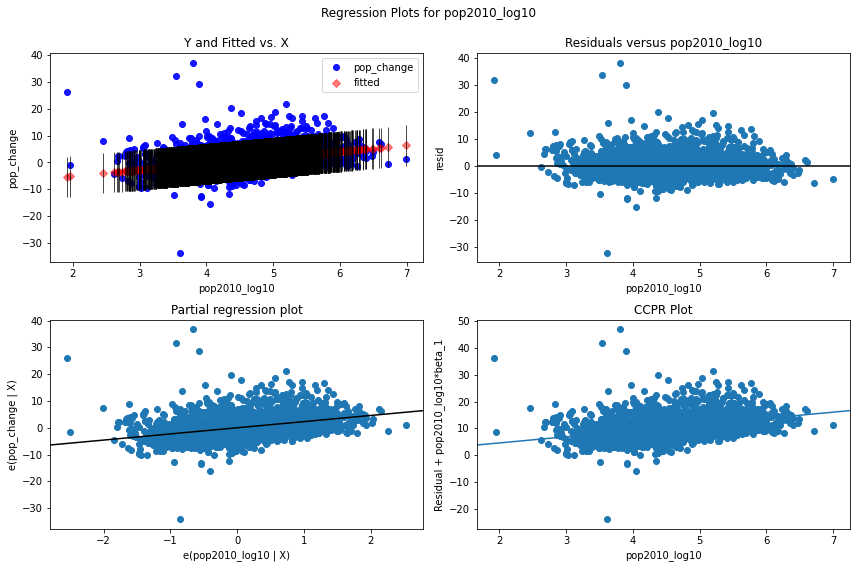

In [186]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'pop2010_log10', fig=fig)

plt.show()

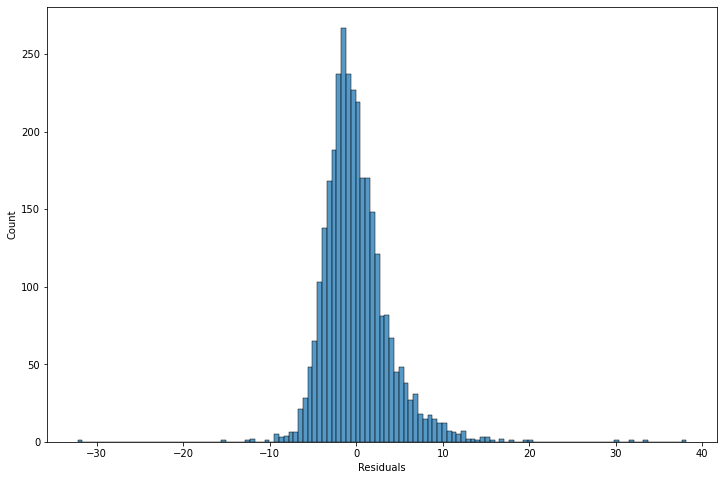

In [187]:
plt.figure(figsize = (12,8))
sns.histplot(model.resid)
plt.xlabel("Residuals")
plt.show()